In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/insurance

/gdrive/MyDrive/insurance


In [4]:
ls

carInsurance_test.csv  carInsurance_train.csv  carInsurance_train.gsheet


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [7]:
df_train=pd.read_csv('carInsurance_train.csv')
df_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [8]:
df_test=pd.read_csv('carInsurance_test.csv')
df_test.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Job               995 non-null    object 
 3   Marital           1000 non-null   object 
 4   Education         953 non-null    object 
 5   Default           1000 non-null   int64  
 6   Balance           1000 non-null   int64  
 7   HHInsurance       1000 non-null   int64  
 8   CarLoan           1000 non-null   int64  
 9   Communication     779 non-null    object 
 10  LastContactDay    1000 non-null   int64  
 11  LastContactMonth  1000 non-null   object 
 12  NoOfContacts      1000 non-null   int64  
 13  DaysPassed        1000 non-null   int64  
 14  PrevAttempts      1000 non-null   int64  
 15  Outcome           243 non-null    object 
 16  CallStart         1000 non-null   object 
 

In [11]:
df_train.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


# EDA

In [12]:
df_train.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [13]:
df_test.isna().sum()

Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [14]:
df_train['Job'].fillna(df_train['Job'].mode()[0], inplace=True)
df_train['Outcome'].fillna(df_train['Outcome'].mode()[0], inplace=True)
df_train['Communication'].fillna(df_train['Communication'].mode()[0], inplace=True)
df_train['Education'].fillna(df_train['Education'].mode()[0], inplace=True)

In [15]:
df_test['Job'].fillna(df_test['Job'].mode()[0], inplace=True)
df_test['Outcome'].fillna(df_test['Outcome'].mode()[0], inplace=True)
df_test['Communication'].fillna(df_test['Communication'].mode()[0], inplace=True)
df_test['Education'].fillna(df_test['Education'].mode()[0], inplace=True)

In [16]:
df_train.isna().sum().sum()

0

In [17]:
df_test.isna().sum().sum()

1000

In [18]:
df_train.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [19]:
df_train.CarInsurance.value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

In [20]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [21]:
binary_cols

['Default', 'HHInsurance', 'CarLoan', 'Communication', 'CarInsurance']

In [22]:
remain_cols

['Id',
 'Age',
 'Job',
 'Marital',
 'Education',
 'Balance',
 'LastContactDay',
 'LastContactMonth',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'Outcome',
 'CallStart',
 'CallEnd']

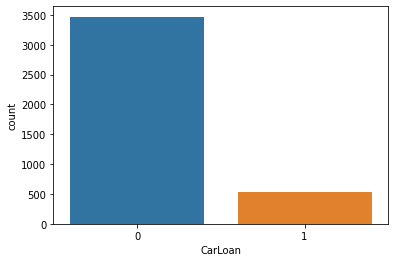

In [23]:
sns.countplot("CarLoan", data=df_train)

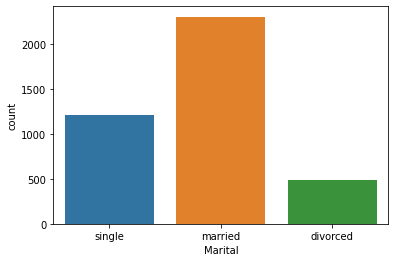

In [24]:
sns.countplot("Marital", data=df_train)

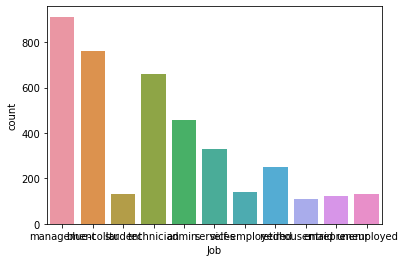

In [25]:
sns.countplot("Job", data=df_train)

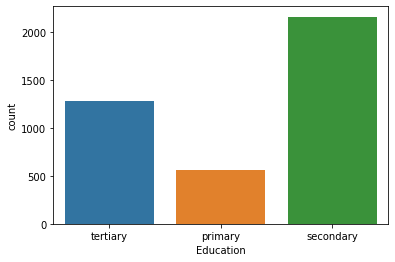

In [26]:
sns.countplot("Education", data=df_train)

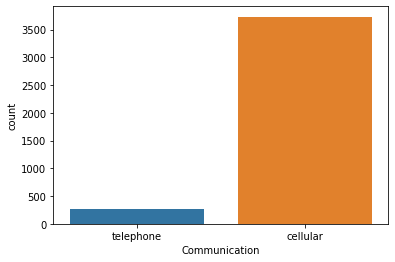

In [27]:
sns.countplot("Communication", data=df_train)

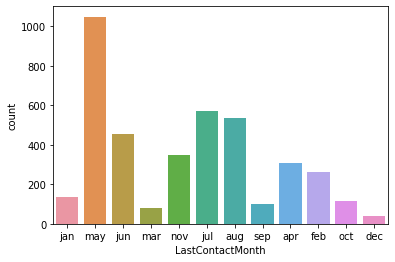

In [28]:
sns.countplot("LastContactMonth", data=df_train)

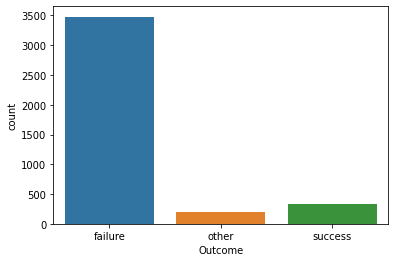

In [29]:
sns.countplot("Outcome", data=df_train)

In [30]:
Marital_numeric = { 'single':0,'married':1,'divorced':2}
df_train.Marital.replace(Marital_numeric, inplace=True)

In [31]:
Education_numeric = { 'tertiary':0,'primary':1,'secondary':2}
df_train.Education.replace(Education_numeric, inplace=True)

In [32]:
Communication_numeric = { 'telephone':0,'cellular':1}
df_train.Communication.replace(Communication_numeric, inplace=True)

In [33]:
LastContactMonth_numeric = { 'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}
df_train.LastContactMonth.replace(LastContactMonth_numeric, inplace=True)

In [34]:
Outcome_numeric = { 'failure':0,'other':1,'success':2}
df_train.Outcome.replace(Outcome_numeric, inplace=True)

In [35]:
Job_numeric = { 'management':0,'blue-collar':1,'student':2 ,'technician':3,'admin.':4,'services':5 ,'self-employed':6,'retired':7,'housemaid':8,'entrepreneur':9,'unemployed':10}
df_train.Job.replace(Job_numeric, inplace=True)

In [36]:
Marital_numeric = { 'single':0,'married':1,'divorced':2}
df_test.Marital.replace(Marital_numeric, inplace=True)
Education_numeric = { 'tertiary':0,'primary':1,'secondary':2}
df_test.Education.replace(Education_numeric, inplace=True)
Communication_numeric = { 'telephone':0,'cellular':1}
df_test.Communication.replace(Communication_numeric, inplace=True)
LastContactMonth_numeric = { 'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}
df_test.LastContactMonth.replace(LastContactMonth_numeric, inplace=True)
Outcome_numeric = { 'failure':0,'other':1,'success':2}
df_test.Outcome.replace(Outcome_numeric, inplace=True)
Job_numeric = { 'management':0,'blue-collar':1,'student':2 ,'technician':3,'admin.':4,'services':5 ,'self-employed':6,'retired':7,'housemaid':8,'entrepreneur':9,'unemployed':10}
df_test.Job.replace(Job_numeric, inplace=True)

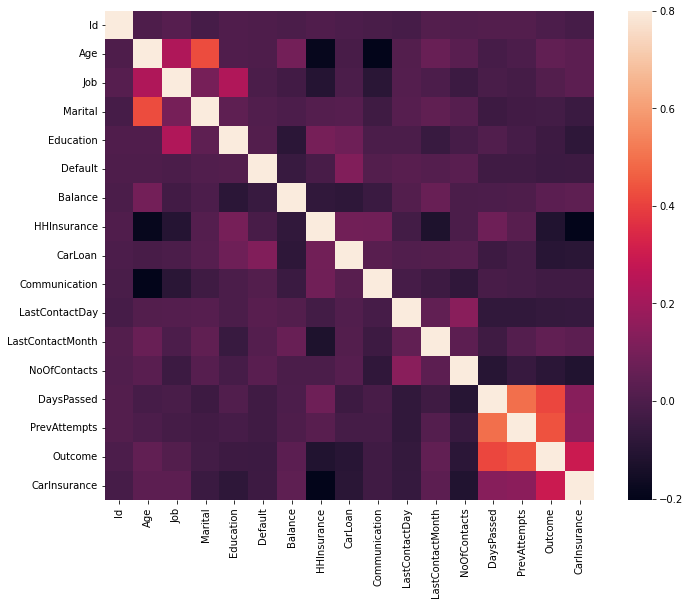

In [37]:
corrmat = df_train.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

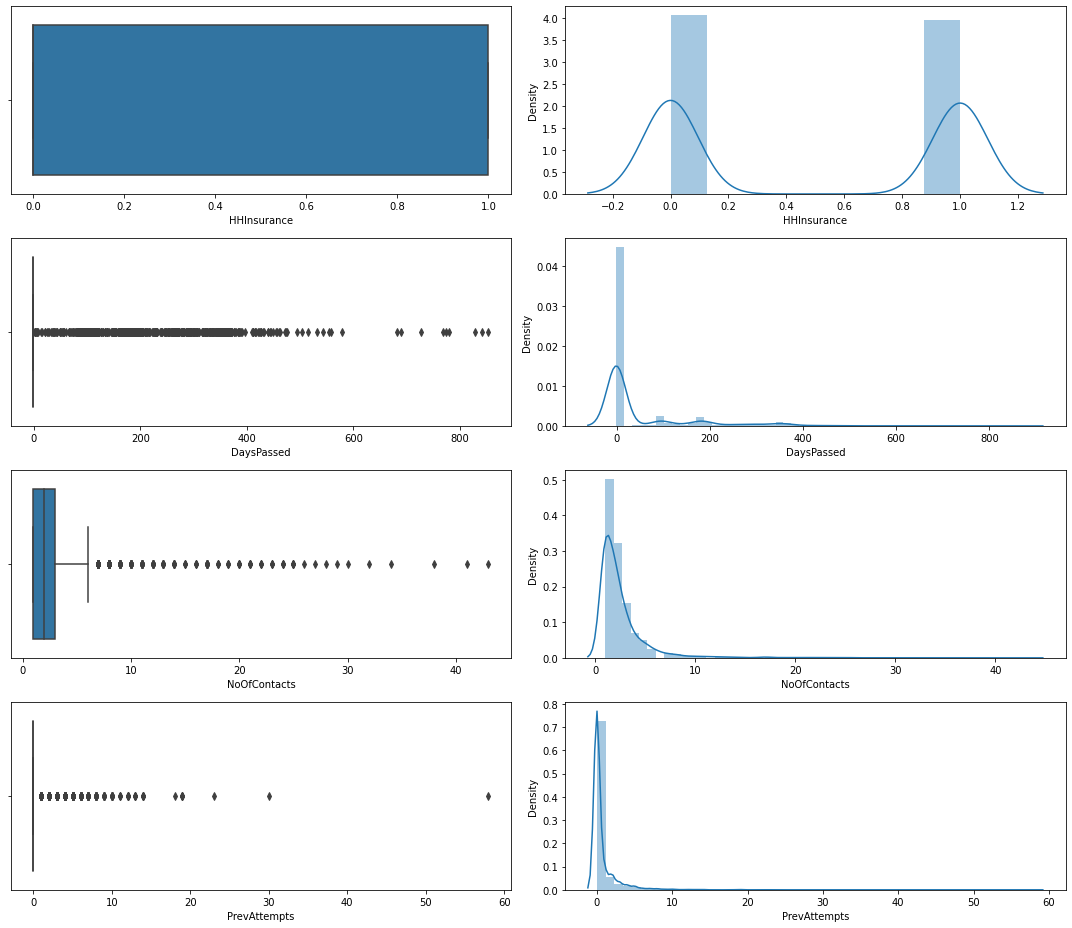

In [38]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["HHInsurance"], ax = ax[0,0])
sns.distplot(df_train['HHInsurance'], ax = ax[0,1])
sns.boxplot(x= df_train["DaysPassed"], ax = ax[1,0])
sns.distplot(df_train['DaysPassed'], ax = ax[1,1])
sns.boxplot(x= df_train["NoOfContacts"], ax = ax[2,0])
sns.distplot(df_train['NoOfContacts'], ax = ax[2,1])
sns.boxplot(x= df_train["PrevAttempts"], ax = ax[3,0])
sns.distplot(df_train['PrevAttempts'], ax = ax[3,1])
plt.tight_layout()

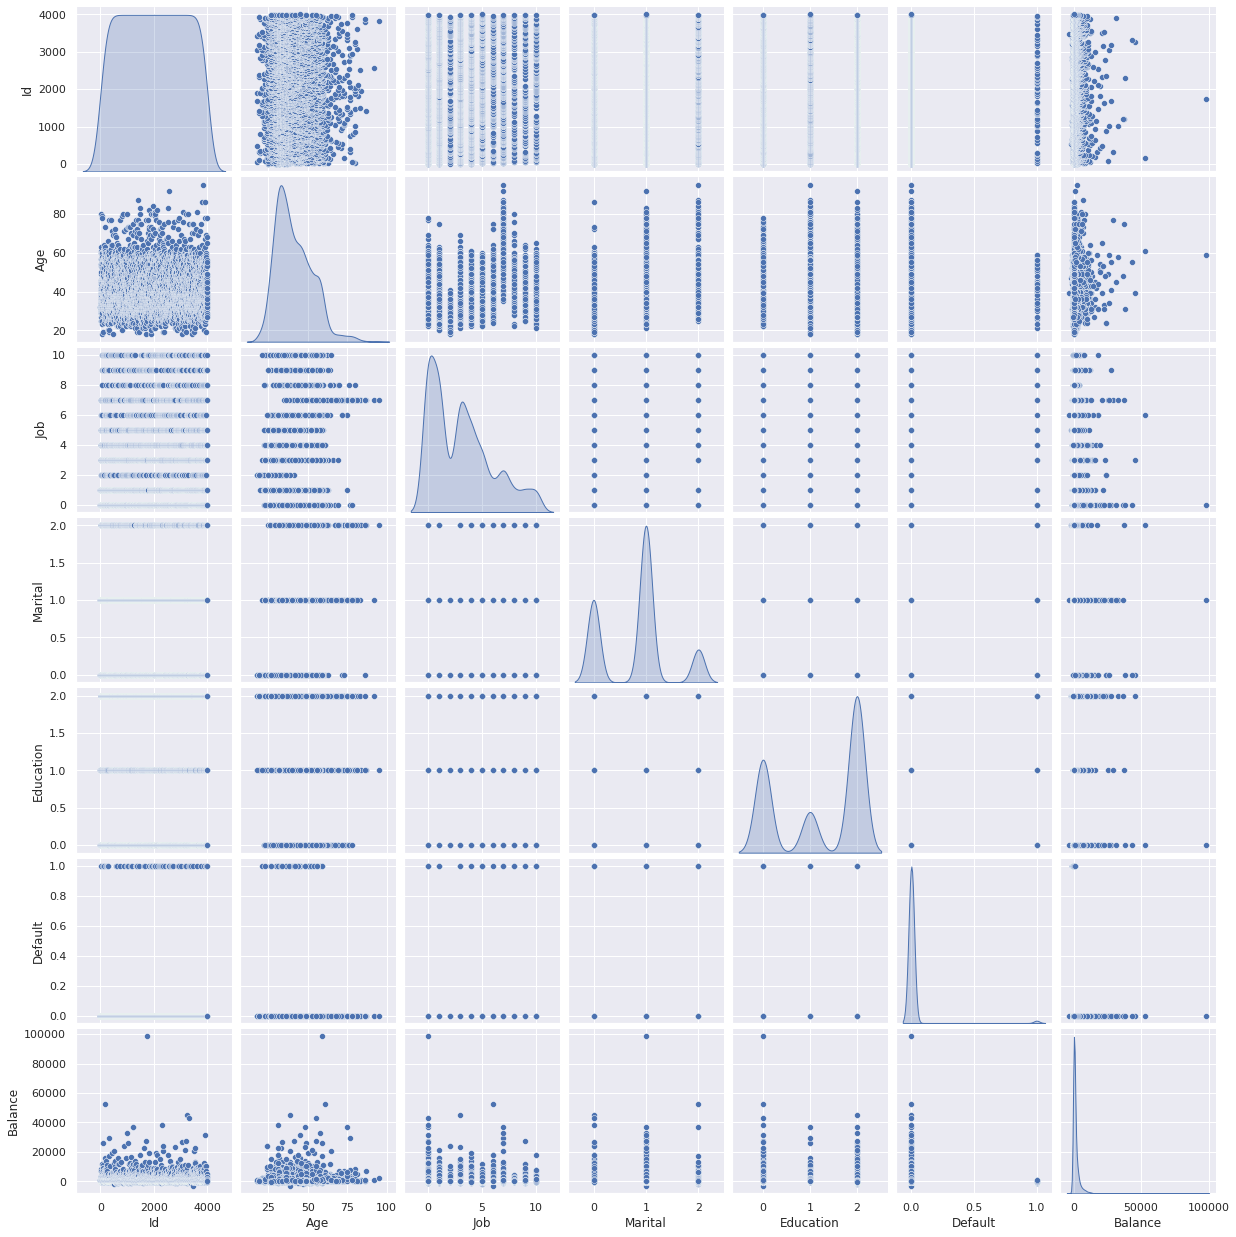

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [40]:
X = df_train.drop(['CarInsurance', 'CallStart',	'CallEnd'], axis = 1)
Y = df_train["CarInsurance"]
x_Data = X.values
y_Data = Y.values

In [41]:
#Q = df_test.drop(['CarInsurance', 'CallStart',	'CallEnd'], axis = 1)
#W = df_test["CarInsurance"]
#q_Data = Q.values
#w_Data = W.values

#X_train=x_Data
#y_train=y_Data
#X_test=q_Data
#y_test=w_Data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [45]:
model.score(X_test,y_test)

0.67625

In [46]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.646875  0.6734375 0.678125  0.665625  0.6578125]


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.6678125

In [49]:
confusion_matrix(y_train, pred)

array([[1626,  286],
       [ 777,  511]])

In [50]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [51]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [52]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       484
           1       0.64      0.42      0.50       316

    accuracy                           0.68       800
   macro avg       0.66      0.63      0.63       800
weighted avg       0.67      0.68      0.66       800



In [53]:
cma = confusion_matrix(y_test, predicted_test)

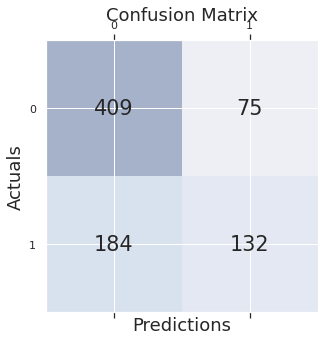

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [55]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [56]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.839375

In [57]:
confusion_matrix(y_train, pred)

array([[1883,   29],
       [ 485,  803]])

In [58]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [59]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [60]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       484
           1       0.77      0.45      0.57       316

    accuracy                           0.73       800
   macro avg       0.74      0.68      0.68       800
weighted avg       0.74      0.73      0.71       800



In [61]:
cma = confusion_matrix(y_test, pred_test)

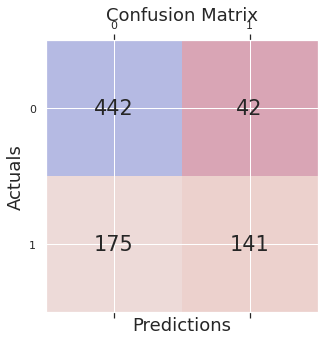

In [62]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [63]:
from sklearn import tree

In [64]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [65]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [66]:
confusion_matrix(y_train, pred1)

array([[1912,    0],
       [   0, 1288]])

In [67]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [68]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       484
           1       0.53      0.56      0.54       316

    accuracy                           0.63       800
   macro avg       0.61      0.62      0.61       800
weighted avg       0.63      0.63      0.63       800



In [69]:
cma = confusion_matrix(y_test, pred1_test)

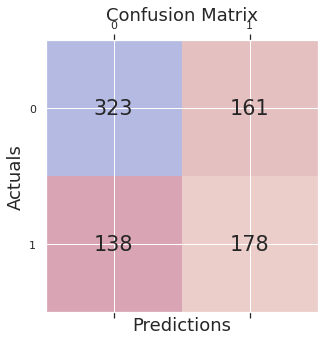

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [72]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.65125

In [73]:
confusion_matrix(y_train, pred_LR)

array([[1641,  271],
       [ 845,  443]])

In [74]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [75]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       484
           1       0.57      0.34      0.42       316

    accuracy                           0.64       800
   macro avg       0.62      0.59      0.58       800
weighted avg       0.62      0.64      0.61       800



In [76]:
cma = confusion_matrix(y_test, pred_LR_test)

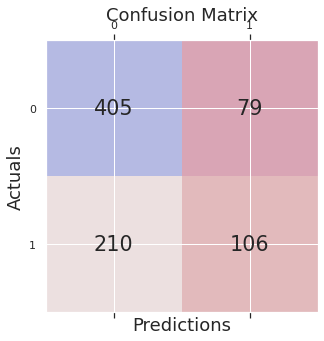

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support Vector Machine

In [78]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train) 

SVC(kernel='linear', random_state=0)

In [83]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

0.655625

In [84]:
confusion_matrix(y_train, pred_SVM)

array([[1683,  229],
       [ 873,  415]])

In [85]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [80]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       484
           1       0.55      0.32      0.40       316

    accuracy                           0.63       800
   macro avg       0.60      0.57      0.57       800
weighted avg       0.61      0.63      0.60       800



In [81]:
cma = confusion_matrix(y_test, pred_SVM_test)

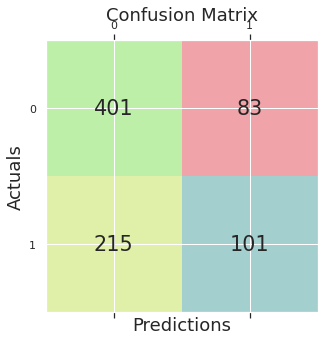

In [82]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
clf= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [88]:
pred_NN= clf.predict(X_train)
accuracy_score(y_train, pred_NN)

0.599375

In [89]:
confusion_matrix(y_train, pred_NN)

array([[1906,    6],
       [1276,   12]])

In [90]:
pred_NN_test = clf.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [91]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       484
           1       0.40      0.01      0.02       316

    accuracy                           0.60       800
   macro avg       0.50      0.50      0.39       800
weighted avg       0.52      0.60      0.46       800



In [92]:
cma = confusion_matrix(y_test, pred_NN_test)

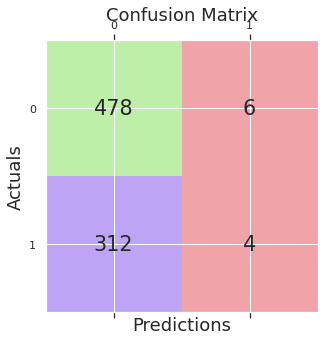

In [93]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [94]:
import xgboost as xgb

In [95]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [96]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.759375

In [97]:
confusion_matrix(y_train, pred_XGB)

array([[1773,  139],
       [ 631,  657]])

In [98]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [99]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       484
           1       0.76      0.45      0.56       316

    accuracy                           0.73       800
   macro avg       0.74      0.68      0.68       800
weighted avg       0.73      0.72      0.71       800



In [100]:
cma = confusion_matrix(y_test, pred_XGB_test)

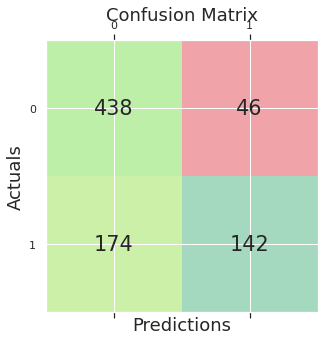

In [101]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

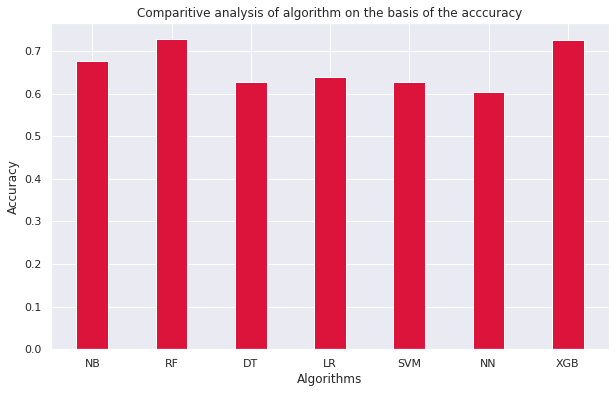

In [107]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'SVM':t,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


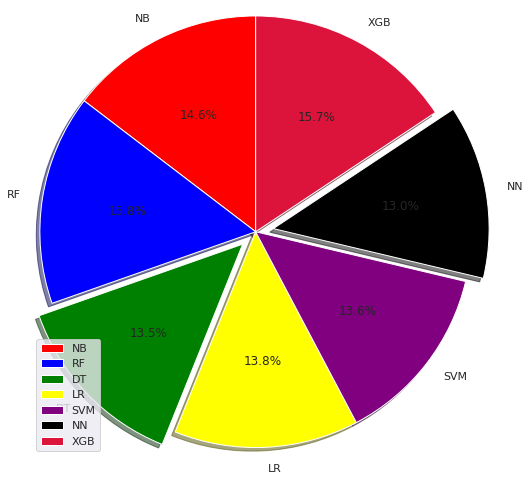

In [103]:
activities = ['NB', 'RF', 'DT', 'LR','SVM','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,t,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()